# Plot Visitation Distributions

#### Primary Authors:
Chris Carey, Nuoyi Wang

#### Description:
This notebook plots the total food location visitations over time.

#### Inputs:
```
exports/home_weekly.csv
```

#### Visualizations:
> Time-series plot total food location visitations

In [1]:
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import pytz

import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
FONT_SIZE_TICKS=13
FONT_SIZE_AXIS=14
FONT_SIZE_TITLE=16
FONT_SIZE_LEGEND=14
tzinfo = pytz.timezone('US/Eastern')

In [3]:
def peek(df):
    display(df.iloc[0:3, :])
    print(len(df))

In [4]:
def repair_dates(df):
    df['date_range_start'] = pd.to_datetime(df['date_range_start'], utc=True)
    df['date_range_start'] = df['date_range_start'].dt.tz_convert('US/Eastern')

In [5]:
def smoothen(df, columns=[], N=2):
    """Returns a copy of the given dataframe with a rolling-day average of the
    given size applied to the given columns."""
    rolling_groupby = df.copy()
    rolling_df = rolling_groupby[columns].rolling(N + 1, center=True).mean()
    rolling_df = rolling_df.reset_index()
    rolling_df = rolling_df.sort_values(by=['date_range_start'])
    rolling_df = rolling_df.set_index(['date_range_start'])
    return rolling_df

In [6]:
home_weekly_df = pd.read_csv(f'./exports/home_weekly.csv')
repair_dates(home_weekly_df)
home_weekly_df = home_weekly_df.rename(columns={'home_cbg': 'cbg'})
peek(home_weekly_df)

,placekey,date_range_start,cbg,visitor_count,estimated_visitor_count,pct_visitor_count,pct_estimated_visitor_count,cdi
0,236-222@627-s7z-b6k,2018-12-31 00:00:00-05:00,360050001001,4,264.000000,0.250000,0.250000,20.076046
1,236-222@627-s7z-b6k,2018-12-31 00:00:00-05:00,360050210021,4,6.697436,0.013158,0.013158,0.509311
2,236-222@627-s7z-b6k,2018-12-31 00:00:00-05:00,360470285021,4,7.414691,0.007273,0.007273,0.563855


27738422


In [7]:
total_df = home_weekly_df.groupby(by=['date_range_start']).agg({
    'visitor_count': 'sum',
    'estimated_visitor_count': 'sum'
}).reset_index()
total_df = total_df.set_index('date_range_start')
total_df = smoothen(total_df,
                    columns=['visitor_count', 'estimated_visitor_count'])
total_df

,visitor_count,estimated_visitor_count
date_range_start,,
2018-12-31 00:00:00-05:00,NaN,NaN
2019-01-07 00:00:00-05:00,1.345694e+06,2.987885e+06
2019-01-14 00:00:00-05:00,1.364274e+06,2.999605e+06
2019-01-21 00:00:00-05:00,1.378141e+06,3.057874e+06
2019-01-28 00:00:00-05:00,1.399974e+06,3.128813e+06
...,...,...
2021-01-18 00:00:00-05:00,5.099867e+05,2.244652e+06
2021-01-25 00:00:00-05:00,4.777530e+05,2.130302e+06
2021-02-01 00:00:00-05:00,4.851440e+05,2.176345e+06


In [8]:
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

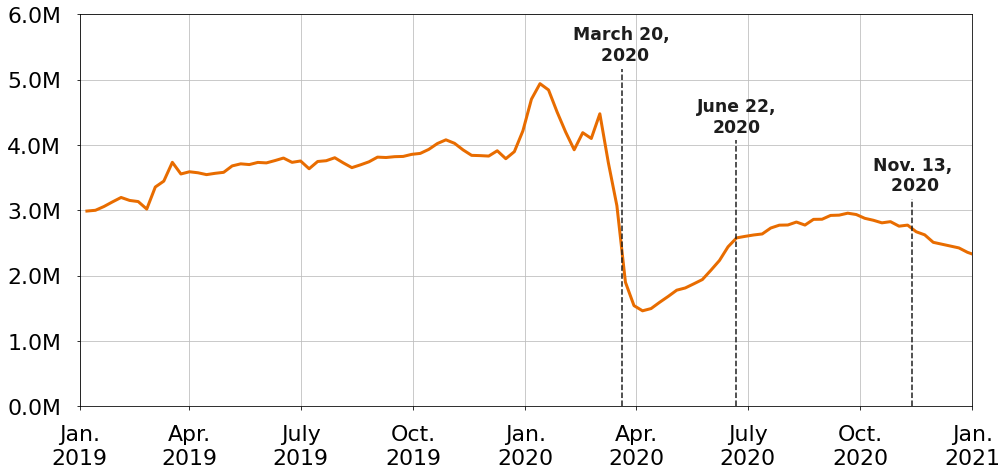

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
total_df['estimated_visitor_count'].plot(kind='line',
                                         color='#e86c00',
                                         linewidth=3)

plt.axvline('2020-03-20', 0, 0.86, color='#1d1d1d', linestyle='dashed')
plt.text('2020-03-20',
         5.3e6,
         "March 20,\n 2020",
         horizontalalignment='center',
         size='xx-large',
         color='#1d1d1d',
         weight='semibold')

plt.axvline('2020-06-22', 0, 0.68, color='#1d1d1d', linestyle='dashed')
plt.text('2020-06-22',
         4.2e6,
         "June 22,\n2020",
         horizontalalignment='center',
         size='xx-large',
         color='#1d1d1d',
         weight='semibold')

plt.axvline('2020-11-13', 0, 0.53, color='#1d1d1d', linestyle='dashed')
plt.text('2020-11-13',
         3.3e6,
         "Nov. 13,\n 2020",
         horizontalalignment='center',
         size='xx-large',
         color='#1d1d1d',
         weight='semibold')

formatter = FuncFormatter(millions)
plt.xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize='22')
plt.yticks(fontsize='22')
ax.set_facecolor('#ffffff')
ax.grid(color='#bdbdbd')
ax.set_ylim([0, 6000000])
ax.set_xlim([
    datetime(2019, 1, 1, 0, 0, tzinfo=tzinfo),
    datetime(2021, 1, 1, 1, 0, tzinfo=tzinfo)
])
plt.setp(ax.spines.values(), color='#000000')
ax.tick_params(axis='x', which='major', pad=15)
ax.tick_params(axis='y', which='major', pad=15)
ax.set_xticklabels([
    'Jan.\n2019',
    'Apr.\n2019',
    'July\n2019',
    'Oct.\n2019',
    'Jan.\n2020',
    'Apr.\n2020',
    'July\n2020',
    'Oct.\n2020',
    'Jan.\n2021',
],
                   rotation=0,
                   ha='center')
plt.show()